In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('ice_cream.csv')

In [187]:
df.tail()

,IPN31152N,rollMean,rollStd
DATE,,,
2019-09-01,100.1741,101.678975,15.021611
2019-10-01,90.1684,101.515333,15.145254
2019-11-01,79.7223,101.289300,15.472611
2019-12-01,75.7094,101.201683,15.626348
2020-01-01,83.6290,100.920867,15.932076


In [137]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [138]:
df.dtypes

DATE         datetime64[ns]
IPN31152N           float64
dtype: object

In [139]:
df.set_index('DATE',inplace=True)

In [140]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


<Axes: xlabel='DATE', ylabel='IPN31152N'>

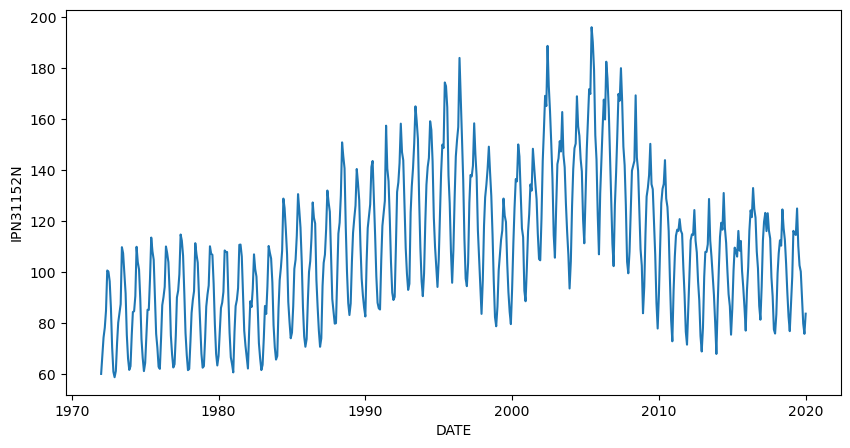

In [141]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.IPN31152N)

In [142]:
df['rollMean'] = df.IPN31152N.rolling(window=12).mean()
df['rollStd'] = df.IPN31152N.rolling(window=12).std()

In [143]:
df

,IPN31152N,rollMean,rollStd
DATE,,,
1972-01-01,59.9622,NaN,NaN
1972-02-01,67.0605,NaN,NaN
1972-03-01,74.2350,NaN,NaN
1972-04-01,78.1120,NaN,NaN
1972-05-01,84.7636,NaN,NaN
...,...,...,...
2019-09-01,100.1741,101.678975,15.021611
2019-10-01,90.1684,101.515333,15.145254
2019-11-01,79.7223,101.289300,15.472611


In [144]:
df.dropna()

,IPN31152N,rollMean,rollStd
DATE,,,
1972-12-01,58.6598,78.073117,15.464092
1973-01-01,61.0996,78.167900,15.346029
1973-02-01,72.2062,78.596708,15.076977
1973-03-01,80.0984,79.085325,15.017666
1973-04-01,83.9059,79.568150,15.076551
...,...,...,...
2019-09-01,100.1741,101.678975,15.021611
2019-10-01,90.1684,101.515333,15.145254
2019-11-01,79.7223,101.289300,15.472611


<Axes: xlabel='DATE', ylabel='IPN31152N'>

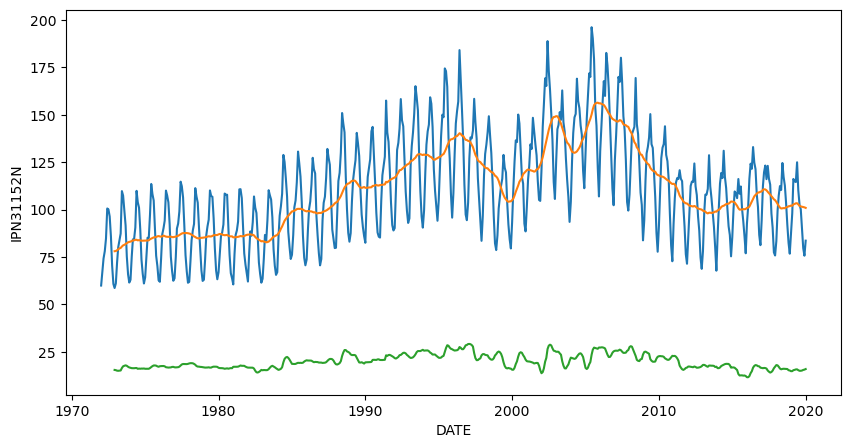

In [145]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.IPN31152N)
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)

In [146]:

ice_df = df[['IPN31152N']].copy()

In [147]:
#By Default, shift by 1 time period (here,one month)
# Create a new column which will contains the shift value from passengers 
#column- see slide
ice_df['Shift'] = ice_df.IPN31152N.shift(1)
ice_df['ShiftDiff'] = ice_df['IPN31152N'] - ice_df['Shift']
ice_df.head(20)

,IPN31152N,Shift,ShiftDiff
DATE,,,
1972-01-01,59.9622,NaN,NaN
1972-02-01,67.0605,59.9622,7.0983
1972-03-01,74.2350,67.0605,7.1745
1972-04-01,78.1120,74.2350,3.8770
1972-05-01,84.7636,78.1120,6.6516
1972-06-01,100.5960,84.7636,15.8324
1972-07-01,100.1263,100.5960,-0.4697
1972-08-01,96.3607,100.1263,-3.7656
1972-09-01,85.8007,96.3607,-10.5600


<Axes: xlabel='DATE', ylabel='IPN31152N'>

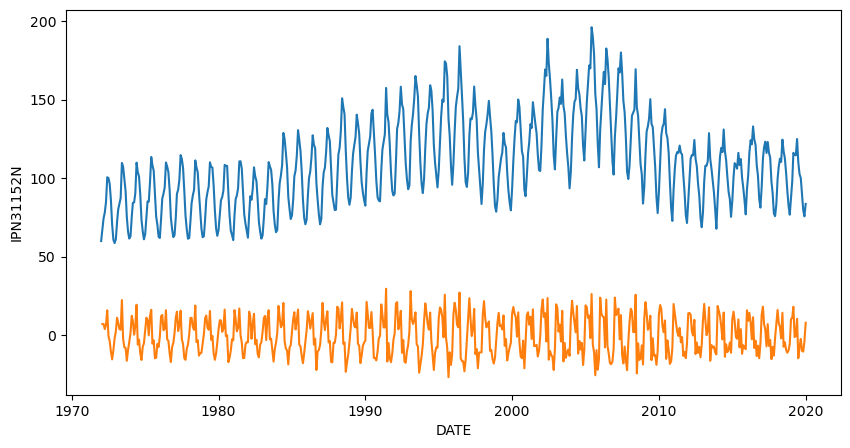

In [148]:
plt.figure(figsize=(10,5))
sns.lineplot(data=ice_df,x=ice_df.index,y=ice_df.IPN31152N)
sns.lineplot(data=ice_df,x=ice_df.index,y=ice_df.ShiftDiff)

# sarimax

In [150]:
train = ice_df[:round(len(ice_df)*70/100)] # take the first 70% data
print(train.tail())  # just to check where it ends
test = ice_df[round(len(ice_df)*70/100):] # take the last 30% data for test, starting from 71%
print(test.head())

            IPN31152N     Shift  ShiftDiff
DATE                                      
2005-04-01   171.8314  159.2750    12.5564
2005-05-01   169.9522  171.8314    -1.8792
2005-06-01   196.1737  169.9522    26.2215
2005-07-01   190.2501  196.1737    -5.9236
2005-08-01   179.2849  190.2501   -10.9652
            IPN31152N     Shift  ShiftDiff
DATE                                      
2005-09-01   153.7389  179.2849   -25.5460
2005-10-01   144.2127  153.7389    -9.5262
2005-11-01   122.2164  144.2127   -21.9963
2005-12-01   106.9509  122.2164   -15.2655
2006-01-01   130.8295  106.9509    23.8786


In [151]:

from pmdarima import auto_arima
model = auto_arima(df['IPN31152N'], seasonal= False,stepwise=True,trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3905.250, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4490.131, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4347.938, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4382.688, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4488.138, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4341.062, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4349.543, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3885.571, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4127.829, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3858.310, Time=0.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4076.974, Time=0.35 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3867.508, Time=0.82 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=4

In [152]:
#Now SARIMAX prediction
model = SARIMAX(train['IPN31152N'],order=(5,1,3),seasonal_order=(5,1,3,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
ice_df['sarimaxpred'] = prediction
print(ice_df.tail())

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            IPN31152N     Shift  ShiftDiff  sarimaxpred
DATE                                                   
2019-09-01   100.1741  102.6085    -2.4344   351.847714
2019-10-01    90.1684  100.1741   -10.0057   343.095794
2019-11-01    79.7223   90.1684   -10.4461   326.746112
2019-12-01    75.7094   79.7223    -4.0129   318.085972
2020-01-01    83.6290   75.7094     7.9196   333.977631


            IPN31152N    Shift  ShiftDiff  sarimaxpred
DATE                                                  
1972-01-01    59.9622      NaN        NaN          NaN
1972-02-01    67.0605  59.9622     7.0983          NaN
1972-03-01    74.2350  67.0605     7.1745          NaN
1972-04-01    78.1120  74.2350     3.8770          NaN
1972-05-01    84.7636  78.1120     6.6516          NaN
            IPN31152N     Shift  ShiftDiff  sarimaxpred
DATE                                                   
2019-09-01   100.1741  102.6085    -2.4344   351.847714
2019-10-01    90.1684  100.1741   -10.0057   343.095794
2019-11-01    79.7223   90.1684   -10.4461   326.746112
2019-12-01    75.7094   79.7223    -4.0129   318.085972
2020-01-01    83.6290   75.7094     7.9196   333.977631


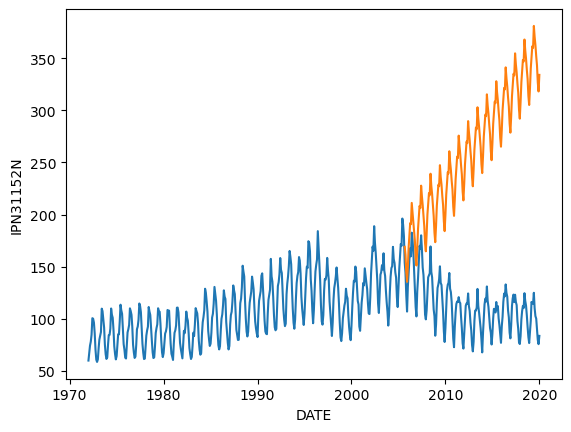

In [153]:
ice_df.dropna()
print(ice_df.head())
sns.lineplot(data=ice_df , x = ice_df.index,y='IPN31152N')
sns.lineplot(data=ice_df , x = ice_df.index,y='sarimaxpred')
#sns.lineplot(data=ice_df , x = ice_df.index,y='arimapred')

#Compare to ARIMA , SARIMAX is much better
#Future Prediction
# First check the last data in your dataset
print(ice_df.tail())

In [154]:
'''
find the best parameters  for arima
from pmdarima import auto_arima
model = auto_arima(df['sale'], seasonal= False,stepwise=True,trace=True)
print(model.summary())

find the best SARIMAX parameters
from pmdarima import auto_arima
model =auto_arima(df['sale'], seasonal= True,m=12,stepwise=True,trace=True) # m is seasonal period
print(model.summary())
'''

"\nfind the best parameters  for arima\nfrom pmdarima import auto_arima\nmodel = auto_arima(df['sale'], seasonal= False,stepwise=True,trace=True)\nprint(model.summary())\n\nfind the best SARIMAX parameters\nfrom pmdarima import auto_arima\nmodel =auto_arima(df['sale'], seasonal= True,m=12,stepwise=True,trace=True) # m is seasonal period\nprint(model.summary())\n"

In [155]:
#arima_model =  ARIMA(train['sale'],order=(5,1,3))

# Monte carlo simulation

In [228]:
import numpy as np

In [230]:
df1 = pd.read_csv('ice_cream.csv',parse_dates=['DATE'])

In [232]:
df1.set_index('DATE',inplace=True)

In [234]:
df1

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [236]:
#Calculate monthly growth rates
# pct_change() function calculates the precentage change between the previous and current month
#if previous month contains 0 it will use nan to avoid exception
df1['growth_rate'] = df1['IPN31152N'].pct_change()

In [238]:
df1

,IPN31152N,growth_rate
DATE,,
1972-01-01,59.9622,NaN
1972-02-01,67.0605,0.118380
1972-03-01,74.2350,0.106985
1972-04-01,78.1120,0.052226
1972-05-01,84.7636,0.085155
...,...,...
2019-09-01,100.1741,-0.023725
2019-10-01,90.1684,-0.099883
2019-11-01,79.7223,-0.115851


In [240]:
#parameters for simulation
mean_growth_rate = df['growth_rate'].mean() 
std_dev_growth_rate = df['growth_rate'].std()

In [242]:
last_sale = df1['IPN31152N'].iloc[-1] # most recent sales value
last_date = df1.index[-1]

In [244]:
num_simulations = 1000
forecast_horizon = 36 # forecast for 36 months

In [246]:
#Monte carlo simulation
simulated_sales_data = []
for _ in range(num_simulations):
    monthly_sales = last_sale
    sale_data = []
    for _ in range(forecast_horizon):
        growth_rate= np.random.normal(mean_growth_rate,std_dev_growth_rate)
        monthly_sales*=(1+growth_rate)
        sale_data.append(monthly_sales)

    simulated_sales_data.append(sale_data)

In [248]:
#Average sales prediction for each mobth
mean_sales_per_month = np.mean(simulated_sales_data,axis=0)

In [250]:
future_dates = []


In [252]:
# loop through the number of months to generate
for i in range(1,forecast_horizon+1):
    future_date = last_date+pd.DateOffset(i) # add i months to the last date
    future_dates.append(future_date)  # append the new date to the list


In [254]:
# Create a dataframe for predictions
predicted_sales_df = pd.DataFrame({
    "Date":future_dates,
    "preddicted_sales" : mean_sales_per_month
})


In [256]:
#print the next 36 months of predicted sales
print(predicted_sales_df)

         Date  preddicted_sales
0  2020-01-02         83.945322
1  2020-01-03         84.477493
2  2020-01-04         85.113269
3  2020-01-05         85.611998
4  2020-01-06         86.160434
5  2020-01-07         86.781958
6  2020-01-08         87.942322
7  2020-01-09         88.301775
8  2020-01-10         88.403156
9  2020-01-11         88.555475
10 2020-01-12         89.336664
11 2020-01-13         89.759509
12 2020-01-14         90.247116
13 2020-01-15         91.332199
14 2020-01-16         91.576840
15 2020-01-17         92.971874
16 2020-01-18         93.997276
17 2020-01-19         94.029718
18 2020-01-20         94.753858
19 2020-01-21         95.324466
20 2020-01-22         95.657212
21 2020-01-23         96.724242
22 2020-01-24         97.550634
23 2020-01-25         97.565581
24 2020-01-26         98.981003
25 2020-01-27         99.896369
26 2020-01-28        100.925997
27 2020-01-29        101.920232
28 2020-01-30        102.830492
29 2020-01-31        103.539455
30 2020-

In [258]:
# Results
mean_total_sales = np.sum(mean_sales_per_month)
risk_of_decline = np.mean([np.sum(sale_data) < (12*last_sale) for sale_data in simulated_sales_data])


In [264]:
print(f"\nExpected total sales (next three years): ${mean_total_sales:.2f}")
print(f"\nprobability of decline  total sales : {risk_of_decline*100:.2f}%")


Expected total sales (next three years): $3419.75

probability of decline  total sales : 0.20%


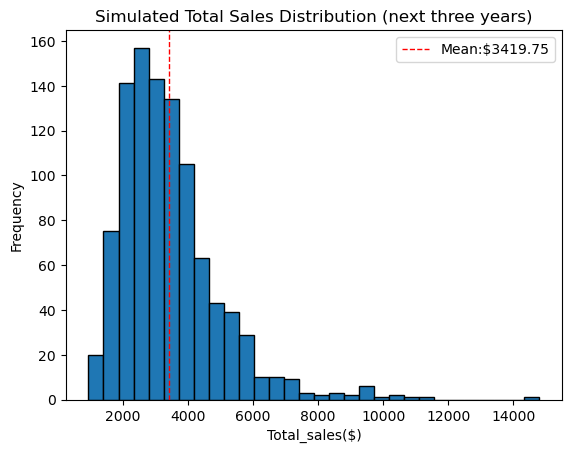

In [270]:
#Visualisation
plt.hist([np.sum(sale_data) for sale_data in simulated_sales_data],bins=30,edgecolor='k')
plt.title('Simulated Total Sales Distribution (next three years)')
plt.xlabel('Total_sales($)')
plt.ylabel('Frequency')
plt.axvline(mean_total_sales,color='red',linestyle='--',linewidth=1,label=f"Mean:${mean_total_sales:.2f}")
plt.legend()